# iPhone SALES ANALYSIS

In [34]:
#importing packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline

In [4]:
#reading the data and viewing the first 5 rows
iPhones_sales=pd.read_csv('C:/Users/pc/Desktop/pydata/apple_products.csv')
print(iPhones_sales.head())

                               Product Name  \
0         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2      APPLE iPhone 8 Plus (Silver, 256 GB)   
3           APPLE iPhone 8 (Silver, 256 GB)   
4             APPLE iPhone 8 (Gold, 256 GB)   

                                         Product URL  Brand  Sale Price  \
0  https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
3  https://www.flipkart.com/apple-iphone-8-silver...  Apple       77000   
4  https://www.flipkart.com/apple-iphone-8-gold-2...  Apple       77000   

     Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
0  49900                    0               3431                356   
1  84900                    0               3431                356   
2  84900                    0               3431     

In [8]:
#checking if there are null values
print(iPhones_sales.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


In [10]:
#descriptive statistics of the dataset
print(iPhones_sales.describe())

          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.000000     4.600000  
75%     

In [23]:
#top 10 highest ranking iPhones in India
iPhones_sales.sort_values(by='Star Rating',ascending=False,inplace=True)
highest_rated=iPhones_sales.head(10)
print(highest_rated['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
40                     APPLE iPhone 12 (Green, 128 GB)
56                     APPLE iPhone 11 (Black, 128 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
Name: Product Name, dtype: object


Text(0.0, 1.0, 'Number of Ratings of Highest Rated iPhones')

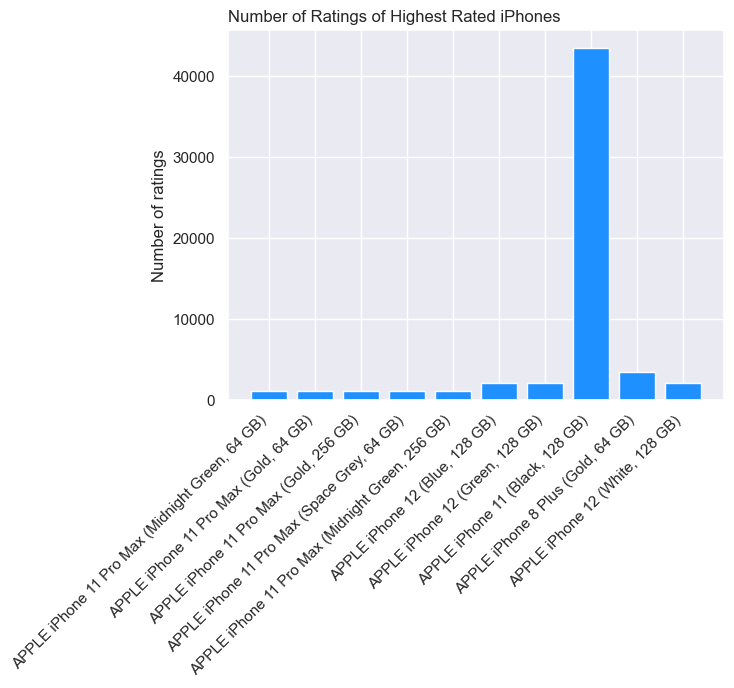

In [52]:
#checking the highest rated iPhones and their number of ratings
top10 = highest_rated.loc[:,['Product Name','Number Of Ratings']]
count_of_ratings=top10['Number Of Ratings']
type_of_iphone=top10['Product Name']
plt.bar(type_of_iphone,count_of_ratings,color='dodgerblue')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of ratings')
plt.title('Number of Ratings of Highest Rated iPhones',loc='left')

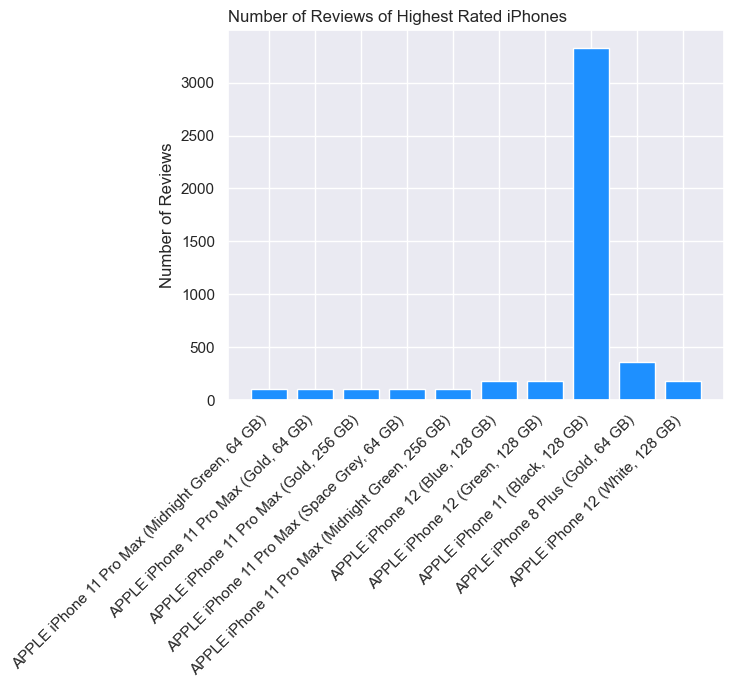

In [61]:
#Checking the number of reviews of highest rated iPhones
num_of_reviews=highest_rated.loc[:,['Product Name','Number Of Reviews']]
reviews_pro_name=num_of_reviews['Product Name']
reviews=num_of_reviews['Number Of Reviews']
plt.bar(reviews_pro_name,reviews,color='dodgerblue')
plt.title('Number of Reviews of Highest Rated iPhones',loc='left')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45,ha='right')
plt.show()

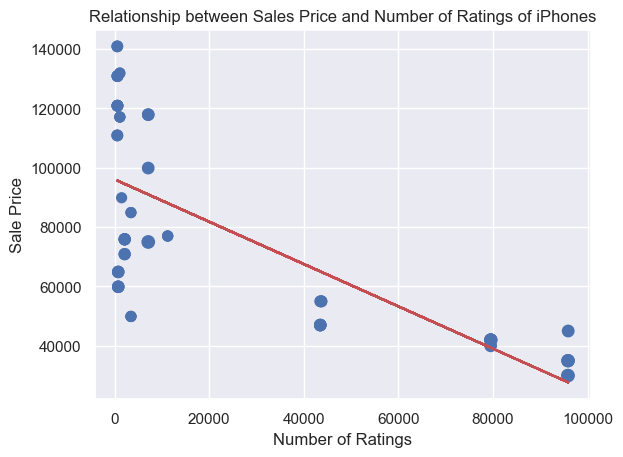

In [92]:
#Finding the relationship between sales price and number of ratings of iPhones
#Per graph, there is a negative relationship between sales price and ratings of iPhones
sale_price=iPhones_sales['Sale Price']
rating=iPhones_sales['Number Of Ratings']
discount=iPhones_sales['Discount Percentage']
plt.scatter(rating,sale_price,s=(discount+50))
z=np.polyfit(rating,sale_price,1)
p=np.poly1d(z)
plt.plot(rating,p(rating),'-r')
plt.xlabel('Number of Ratings')
plt.ylabel('Sale Price')
plt.title('Relationship between Sales Price and Number of Ratings of iPhones')
plt.show()

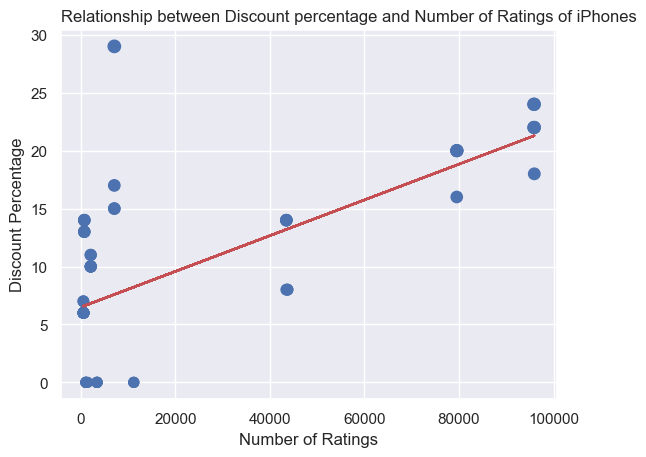

In [105]:
#Finding the relationship between discount percentage and number of ratings of iPhones
#Per graph, there is a positive relationship between discount percentage and ratings of iPhones
plt.scatter(rating,discount,s=(discount+50))
plt.xlabel('Number of Ratings')
plt.ylabel('Discount Percentage')
plt.title('Relationship between Discount percentage and Number of Ratings of iPhones',loc='left')
z=np.polyfit(rating,discount,1)
p=np.poly1d(z)
plt.plot(rating,p(rating),'-r')
plt.show()